In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

cars = pd.read_excel('F:\\New folder\\Used_Cars.xlsx')
cars

,name,year,km_driven,engine,max_power,seats,selling_price
0,Maruti,2014,145500,1248,74.00,5,450000
1,Skoda,2014,120000,1498,103.52,5,370000
2,Honda,2006,140000,1497,78.00,5,158000
3,Hyundai,2010,127000,1396,90.00,5,225000
4,Maruti,2007,120000,1298,88.20,5,130000
...,...,...,...,...,...,...,...
7881,Hyundai,2011,128000,1582,126.32,5,450000
7882,Honda,2006,70000,1497,100.00,5,160000
7883,Honda,2004,120000,1343,90.00,5,135000
7884,Hyundai,2012,128000,1582,126.32,5,450000


In [72]:
cars.describe()

,year,km_driven,engine,max_power,seats,selling_price
count,7886.000000,7.886000e+03,7886.000000,7886.000000,7886.000000,7.886000e+03
mean,2013.986939,6.919015e+04,1459.163581,91.623643,5.417195,6.503759e+05
std,3.860169,5.681374e+04,504.130396,35.771870,0.959644,8.143784e+05
min,1994.000000,1.000000e+00,624.000000,32.800000,2.000000,2.999900e+04
25%,2012.000000,3.500000e+04,1197.000000,68.050000,5.000000,2.700000e+05
50%,2015.000000,6.000000e+04,1248.000000,82.000000,5.000000,4.500000e+05
75%,2017.000000,9.515000e+04,1582.000000,102.000000,5.000000,6.900000e+05
max,2020.000000,2.360457e+06,3604.000000,400.000000,14.000000,1.000000e+07


In [73]:
corr_matrix = cars.corr()
corr_matrix

,year,km_driven,engine,max_power,seats,selling_price
year,1.000000,-0.428029,0.017708,0.226151,-0.008457,0.412300
km_driven,-0.428029,1.000000,0.206294,-0.038047,0.227336,-0.222019
engine,0.017708,0.206294,1.000000,0.703870,0.610707,0.455699
max_power,0.226151,-0.038047,0.703870,1.000000,0.191508,0.749710
seats,-0.008457,0.227336,0.610707,0.191508,1.000000,0.041373
selling_price,0.412300,-0.222019,0.455699,0.749710,0.041373,1.000000


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='km_driven', ylabel='year'>,
        <AxesSubplot:xlabel='engine', ylabel='year'>,
        <AxesSubplot:xlabel='max_power', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='km_driven'>,
        <AxesSubplot:xlabel='km_driven', ylabel='km_driven'>,
        <AxesSubplot:xlabel='engine', ylabel='km_driven'>,
        <AxesSubplot:xlabel='max_power', ylabel='km_driven'>],
       [<AxesSubplot:xlabel='year', ylabel='engine'>,
        <AxesSubplot:xlabel='km_driven', ylabel='engine'>,
        <AxesSubplot:xlabel='engine', ylabel='engine'>,
        <AxesSubplot:xlabel='max_power', ylabel='engine'>],
       [<AxesSubplot:xlabel='year', ylabel='max_power'>,
        <AxesSubplot:xlabel='km_driven', ylabel='max_power'>,
        <AxesSubplot:xlabel='engine', ylabel='max_power'>,
        <AxesSubplot:xlabel='max_power', ylabel='max_power'>]],
      dtype=object)

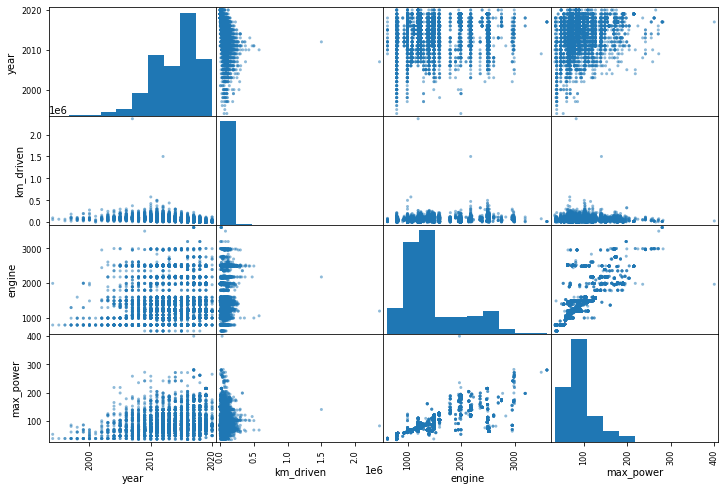

In [74]:
from pandas.plotting import scatter_matrix
attributes = ['year','km_driven','engine','max_power']
scatter_matrix(cars[attributes], figsize=(12, 8))


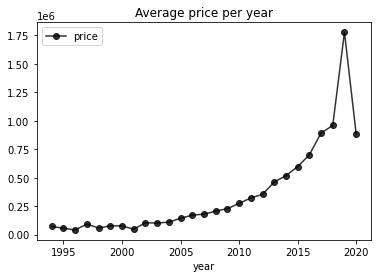

In [75]:
#Average price for each car per year
year = cars.groupby('year')['selling_price'].mean().reset_index(name = 'price')
data = year.sort_values(by = 'year')
Year = data.set_index('year')
Year.plot(kind ='line', color='k',alpha=0.8, marker = 'o')
plt.title('Average price per year')
plt.show()

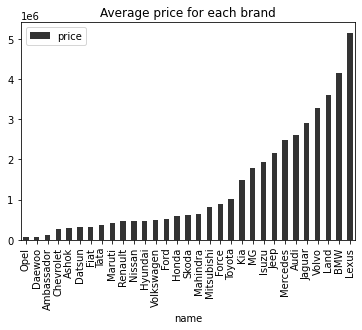

In [76]:
#Average price for each car
name = cars.groupby('name')['selling_price'].mean().reset_index(name = 'price')
car = name.sort_values(by = 'price')
Car = car.set_index('name')
Car.plot(kind ='bar', color='k',alpha=0.8 )
plt.title('Average price for each brand')
plt.show()

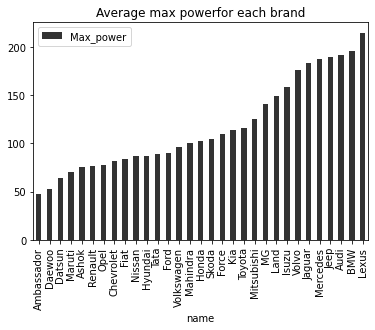

In [77]:
#Max power average for each brand
brand = cars.groupby('name')['max_power'].mean().reset_index(name = 'Max_power')
car = brand.sort_values(by = 'Max_power')
Car = car.set_index('name')
Car.plot(kind ='bar', color='k',alpha=0.8 )
plt.title('Average max powerfor each brand')
plt.show()

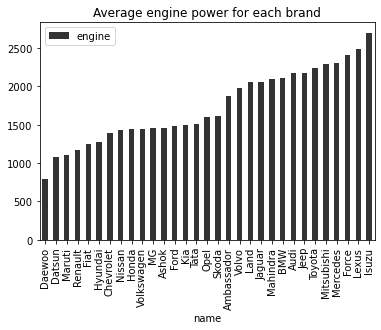

In [78]:
#Engine power average for each brand
brand = cars.groupby('name')['engine'].mean().reset_index(name = 'engine')
car = brand.sort_values(by = 'engine')
Car = car.set_index('name')
Car.plot(kind ='bar', color='k',alpha=0.8 )
plt.title('Average engine power for each brand')
plt.show()

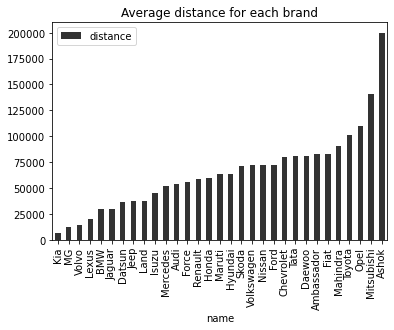

In [79]:
#Average distance for each brand over years
brand = cars.groupby('name')['km_driven'].mean().reset_index(name = 'distance')
car = brand.sort_values(by = 'distance')
Car = car.set_index('name')
Car.plot(kind ='bar', color='k',alpha=0.8 )
plt.title('Average distance for each brand')
plt.show()

In [80]:
#Average of engine power, max power and price for each brand based on model year 
names = cars.groupby(['name','year'])
data = names.agg({'engine':'mean','max_power':'mean','selling_price':'mean'})
data

engine  max_power  selling_price
name       year                                      
Ambassador 1994  1995.00000   52.00000   9.900000e+04
           2000  1489.00000   35.50000   7.500000e+04
           2008  1995.00000   52.00000   1.610000e+05
Ashok      2013  1461.00000   75.00000   3.000000e+05
Audi       2009  2967.00000  241.40000   9.175000e+05
...                     ...        ...            ...
Volvo      2014  1984.00000  181.00000   2.500000e+06
           2016  1984.00000  181.00000   1.950000e+06
           2017  1969.00000  400.00000   1.000000e+07
           2018  1982.59375  155.15625   2.627344e+06
           2019  1969.00000  190.00000   3.854839e+06

[290 rows x 3 columns]

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
z = cars['name']
Z = le.fit_transform(z)
cars['name'] = Z
cars['name']

0       20
1       26
2       10
3       11
4       20
        ..
7881    11
7882    10
7883    10
7884    11
7885    25
Name: name, Length: 7886, dtype: int32

In [82]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cars, test_size=0.20,random_state=42)

In [83]:
len(train_set)

6308

In [84]:
len(test_set)

1578

In [85]:
car_train = train_set.drop("selling_price", axis=1)
train_labels = train_set["selling_price"].copy()
car_train

,name,year,km_driven,engine,max_power,seats
196,20,2016,50000,998,58.16,5
4475,10,2017,35000,1497,117.60,5
3529,19,2017,46000,2179,120.00,7
415,11,2017,45000,1396,88.70,5
5022,19,2007,80000,2523,63.00,7
...,...,...,...,...,...,...
5226,20,2019,5000,1197,83.10,5
5390,10,2016,60000,1198,86.80,5
860,11,2003,90000,1495,94.00,5
7603,3,2012,155000,1995,181.00,4


In [86]:
test_labels = test_set['selling_price'].copy()
car_test = test_set.drop("selling_price", axis=1)
car_test 

,name,year,km_driven,engine,max_power,seats
1402,11,2018,30000,1197,81.83,5
6494,10,2006,70000,1799,130.00,5
5313,28,2010,426000,2494,102.00,7
5422,11,2011,50000,1086,62.10,5
5167,28,2016,110000,2393,147.80,7
...,...,...,...,...,...,...
7003,19,2018,31000,1198,77.00,6
5693,9,2019,7000,1194,94.93,5
4856,20,2016,70000,1248,88.50,5
7767,20,2015,120000,1248,74.00,5


In [87]:
test_labels

1402     700000
6494     121000
5313     950000
5422     210000
5167    1800000
         ...   
7003     420000
5693     675000
4856     700000
7767     530000
4740     135000
Name: selling_price, Length: 1578, dtype: int64

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

In [89]:
dec_reg = DecisionTreeRegressor()

dec_reg.fit(car_train, train_labels)
y_pred = dec_reg.predict(car_test)
    
print("\tMean absolute error:", mean_absolute_error(test_labels, y_pred))
print("\tR2 score:", r2_score(test_labels, y_pred))
print()

	Mean absolute error: 77990.0465538053
	R2 score: 0.9562524283809185



In [90]:
ext_reg = RandomForestRegressor()

ext_reg.fit(car_train, train_labels)
y_pred = ext_reg.predict(car_test)
    
print("\tMean absolute error:", mean_absolute_error(test_labels, y_pred))
print("\tR2 score:", r2_score(test_labels, y_pred))
print()

	Mean absolute error: 70052.96355281689
	R2 score: 0.9691399482334776



In [91]:
frame = pd.read_excel('F:\\New folder\\End.xlsx')
frame

,name,year,km_driven,engine,max_power,seats,selling_price
0,15,2019,20000,1493,113.40,5,1575000
1,9,2018,24000,1498,98.63,5,750000
2,20,2017,12000,998,67.04,5,425000
3,28,2014,50000,1364,67.06,5,425000
4,9,2018,24000,1498,98.63,5,746000
5,28,2010,129000,2494,102.00,8,425000
6,20,2011,73000,796,46.30,5,200000
7,20,1997,120000,796,37.00,4,40000
8,20,2017,45000,998,67.10,5,340000
9,20,2015,50000,1248,74.00,5,625000


In [92]:
Test_labels = frame["selling_price"].copy()
test1 = frame.drop("selling_price", axis=1)
test1

,name,year,km_driven,engine,max_power,seats
0,15,2019,20000,1493,113.40,5
1,9,2018,24000,1498,98.63,5
2,20,2017,12000,998,67.04,5
3,28,2014,50000,1364,67.06,5
4,9,2018,24000,1498,98.63,5
5,28,2010,129000,2494,102.00,8
6,20,2011,73000,796,46.30,5
7,20,1997,120000,796,37.00,4
8,20,2017,45000,998,67.10,5
9,20,2015,50000,1248,74.00,5


In [94]:
Y_pred = ext_reg.predict(test1)
Y_pred

array([898939.99      , 902090.        , 419841.58633333, 471149.94      ,
       902090.        , 514130.        , 149215.83333333,  67249.98      ,
       366319.96      , 595522.32142857, 373890.        , 397256.65666667,
       125097.3725    , 243109.00161111, 503089.925     , 353024.99      ,
       201576.78571429, 211617.63888889, 273713.94      , 273713.94      ])